## 산업분류(Industry)

In [ ]:
# !pip install xlrd

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

/home/minjeong/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [28]:
in_2017 = pd.read_excel('./data/industry/2017.xls')
in_2018 = pd.read_excel('./data/industry/2018.xls')
in_2019 = pd.read_excel('./data/industry/2019.xls')
in_2020 = pd.read_excel('./data/industry/2020.xls')
in_2021 = pd.read_excel('./data/industry/2021.xls')
in_2022 = pd.read_excel('./data/industry/2022.xls')

In [3]:
for year in range(2017, 2023):
    new_header = globals()[f"in_{year}"].iloc[3]
    industry = globals()[f"in_{year}"][4:]
    industry.columns = new_header
    industry = industry.iloc[:, 1:]
    industry = industry.reset_index(drop=True)
    industry['소계열'].fillna(method='ffill', inplace=True)
    globals()[f"ind_{year}"] = industry.copy()

In [6]:
ind_total = pd.concat([ind_2017, ind_2018, ind_2019, ind_2020, ind_2021, ind_2022], axis=0)
ind_total = ind_total.reset_index(drop=True)

In [30]:
ind_total

3,소계열,학과명,주야간구분,계,남,여,계,남,여,계,...,여,계,남,여,계,남,여,계,남,여
0,간호학,간호학과,일반과정_주간,60,5,55,50,4,46,50,...,0,0,0,0,0,0,0,0,0,0
1,건축ㆍ설비공학,건축·사회환경공학과,일반과정_주간,10,10,0,8,8,0,8,...,0,0,0,0,0,0,0,0,0,0
2,건축ㆍ설비공학,건축공학과 건축공학전공,일반과정_주간,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,건축학,건축사회환경공학부,일반과정_주간,97,75,22,48,36,12,48,...,0,0,0,0,0,0,0,0,0,0
4,건축학,건축학과,일반과정_주간,53,38,15,35,26,9,35,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,행정학,행정학과,일반과정_주간,153,73,80,54,34,20,54,...,0,0,0,0,0,0,0,0,0,0
423,화학,화학과,일반과정_주간,47,28,19,16,11,5,16,...,0,0,0,0,0,0,0,1,1,0
424,화학공학,화공생명공학과,일반과정_주간,93,69,24,36,29,7,36,...,0,0,0,0,0,0,0,0,0,0
425,환경학,지구환경과학과,일반과정_주간,38,24,14,17,11,6,17,...,0,0,0,0,0,0,0,0,0,0


In [7]:
ind_total.to_csv('./data/industry/industry.csv', index=False)

## 취업현황(employment)

In [8]:
# !pip install msoffcrypto-tool
# !pip install openpyxl

In [ ]:
import msoffcrypto
import pandas as pd

# Decrypting the files
for i in range(2017, 2023):
    with open(f"./data/industry/{i}.xls", "rb") as file:
        office_file = msoffcrypto.OfficeFile(file)
        office_file.load_key(password="datahub")
        with open(f"./data/industry/decrypted_{i}.xlsx", "wb") as decrypted_file:
            office_file.decrypt(decrypted_file)

In [9]:
em_2017 = pd.read_excel('./data/employment/decrypted_2017.xlsx')
em_2018 = pd.read_excel('./data/employment/decrypted_2018.xlsx')
em_2019 = pd.read_excel('./data/employment/decrypted_2019.xlsx')
em_2020 = pd.read_excel('./data/employment/decrypted_2020.xlsx')
em_2021 = pd.read_excel('./data/employment/decrypted_2021.xlsx')
em_2022 = pd.read_excel('./data/employment/decrypted_2022.xlsx')

In [10]:
em_total = pd.concat([em_2017, em_2018, em_2019, em_2020, em_2021, em_2022], axis=0)
em_total.to_csv('./data/employment/employment.csv', index=False)

# EDA

In [11]:
import pandas as pd

ind = pd.read_csv('./data/industry/industry.csv', encoding='utf-8')

In [14]:
df = pd.DataFrame(ind.groupby('소계열')['계'].sum())
df.head()

,계
소계열,
간호학,362
건축ㆍ설비공학,25
건축학,846
경영학,3085
경제학,1197


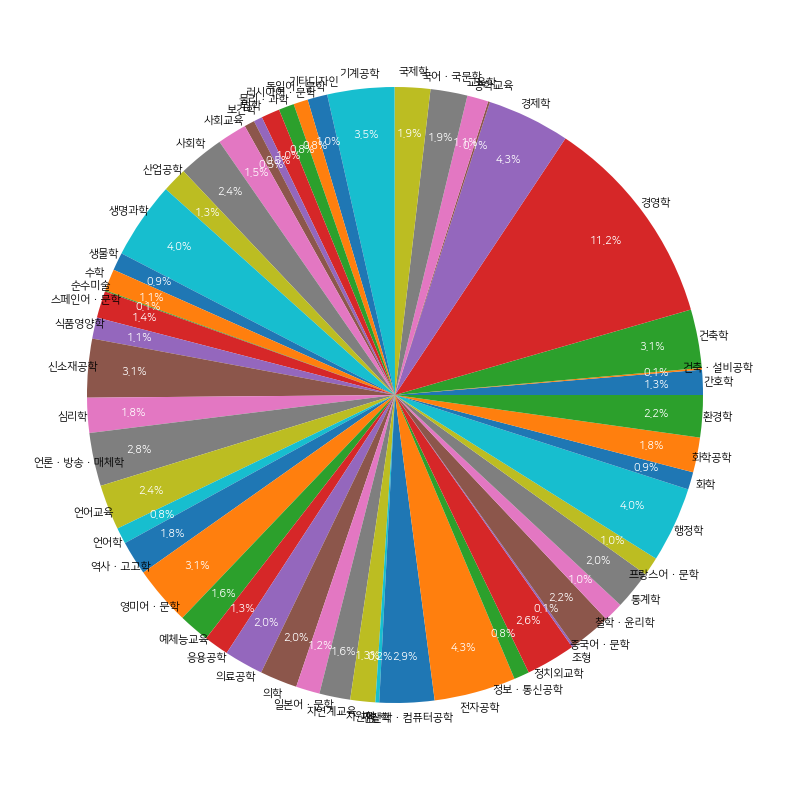

In [16]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="./NanumSquareEB.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(df['계'], labels=df.index, autopct='%.1f%%', pctdistance=0.85)

# 레이블과 비율 텍스트의 스타일 및 위치 조정
plt.setp(texts, size=8)  
plt.setp(autotexts, size=8, color="white") 

# 가이드 라인 추가와 레이블 위치 조정
for wedge, text, autotext in zip(wedges, texts, autotexts):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 1.05 * np.cos(np.deg2rad(angle)) 
    y = wedge.r * 1.05 * np.sin(np.deg2rad(angle))
    text.set_position((x, y))
    text.set_horizontalalignment('center')

plt.show()

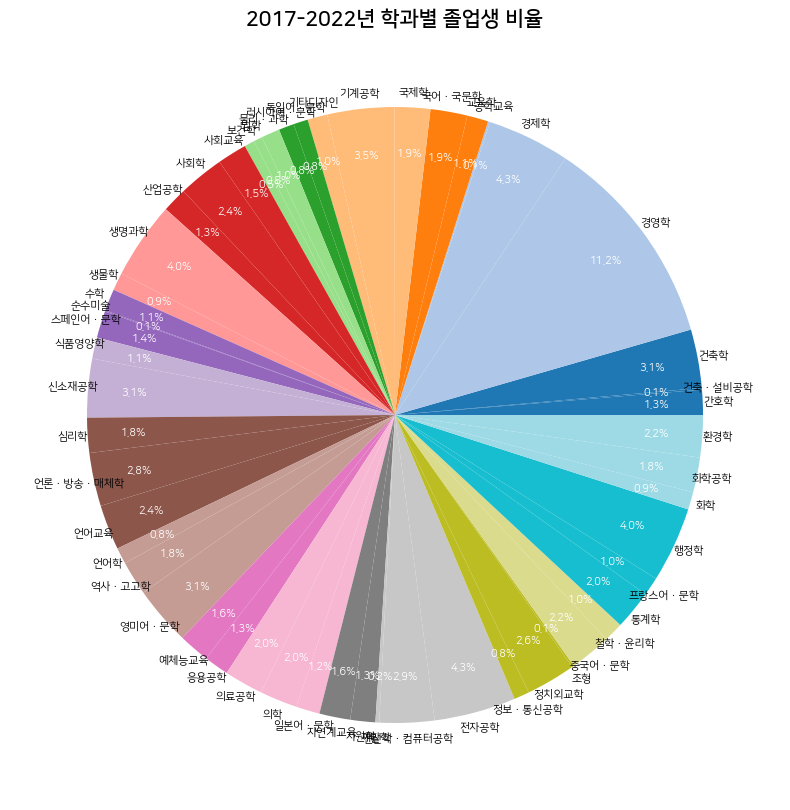

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np

# 한글 폰트 설정
font_name = font_manager.FontProperties(fname="./NanumSquareEB.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 색상 팔레트 설정
colors = plt.get_cmap('tab20')

plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(df['계'], labels=df.index, autopct='%.1f%%', pctdistance=0.85, colors=colors(np.linspace(0, 1, df.shape[0])))

# 레이블과 비율 텍스트의 스타일 및 위치 조정
plt.setp(texts, size=8) 
plt.setp(autotexts, size=8, color="white")  

# 가이드 라인 추가와 레이블 위치 조정
for wedge, text, autotext in zip(wedges, texts, autotexts):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 1.05 * np.cos(np.deg2rad(angle)) 
    y = wedge.r * 1.05 * np.sin(np.deg2rad(angle))
    text.set_position((x, y))
    text.set_horizontalalignment('center')

plt.title('2017-2022년 학과별 졸업생 비율', fontsize=15, fontweight='bold', pad=0)
plt.show()

In [80]:
# df의 분류가 IT일 경우 공학으로 변경
df.loc[df['분류'] == 'IT', '분류'] = '공학'

In [82]:
df.query('분류 == "공학"')['소계열'].tolist()

['건축ㆍ설비공학',
 '건축학',
 '기계공학',
 '산업공학',
 '신소재공학',
 '응용공학',
 '전산학ㆍ컴퓨터공학',
 '전자공학',
 '정보ㆍ통신공학',
 '화학공학']

In [74]:
df.query('분류 == "교육"')['소계열'].tolist()

['공학교육', '교육학', '사회교육', '언어교육', '예체능교육', '자연계교육']

In [75]:
df.query('분류 == "사회"')['소계열'].tolist()

['경영학', '경제학', '국제학', '법학', '사회학', '언론ㆍ방송ㆍ매체학', '정치외교학', '행정학']

In [76]:
df.query('분류 == "예체능"')['소계열'].tolist()

['기타디자인', '순수미술', '조형']

In [77]:
df.query('분류 == "의약"')['소계열'].tolist()

['간호학', '보건학', '의료공학', '의학', '재활학']

In [78]:
df.query('분류 == "인문"')['소계열'].tolist()

['국어ㆍ국문학',
 '독일어ㆍ문학',
 '러시아어ㆍ문학',
 '스페인어ㆍ문학',
 '심리학',
 '언어학',
 '역사ㆍ고고학',
 '영미어ㆍ문학',
 '일본어ㆍ문학',
 '중국어ㆍ문학',
 '철학ㆍ윤리학',
 '프랑스어ㆍ문학']

In [79]:
df.query('분류 == "자연"')['소계열'].tolist()

['물리ㆍ과학', '생명과학', '생물학', '수학', '식품영양학', '자원학', '통계학', '화학', '환경학']

In [ ]:
df2 = pd.DataFrame(df.groupby('분류')['계'].sum())
df2.reset_index(inplace=True)
df2

,분류,계
0,공학,6104
1,교육,2305
2,사회,8162
3,예체능,332
4,의약,1669
5,인문,4938
6,자연,4051


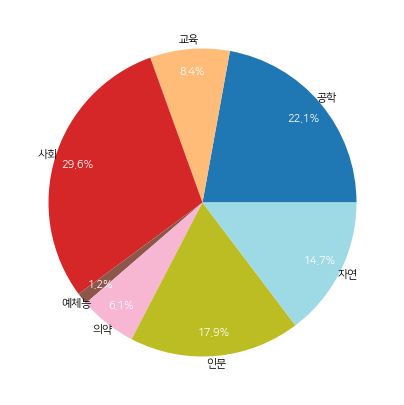

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np

# 한글 폰트 설정
font_name = font_manager.FontProperties(fname="./NanumSquareEB.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 색상 팔레트 설정
colors = plt.get_cmap('tab')

plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(df2['계'], labels=df2['분류'], autopct='%.1f%%', pctdistance=0.85, colors=colors(np.linspace(0, 1, df2.shape[0])))

# 레이블과 비율 텍스트의 스타일 및 위치 조정
plt.setp(texts, size=8)  
plt.setp(autotexts, size=8, color="white")  

# 가이드 라인 추가와 레이블 위치 조정
for wedge, text, autotext in zip(wedges, texts, autotexts):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = wedge.r * 1.05 * np.cos(np.deg2rad(angle)) 
    y = wedge.r * 1.05 * np.sin(np.deg2rad(angle))
    text.set_position((x, y))
    text.set_horizontalalignment('center')

plt.title('2017~2022년 학과별 졸업생 비율', fontsize=15, fontweight='bold', pad=0)
plt.show()

----